In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
pd.set_option('max_columns', 500) 
pd.set_option('max_rows', 500) 
pd.set_option('display.max_colwidth', 300)
pd.options.display.float_format = "{:,.3f}".format

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import requests
import time
import random

from collections import Counter
from bs4 import BeautifulSoup

import regex as re

import nltk

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams

import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.doc2vec import TaggedDocument

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import utils

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks

from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import f1_score, classification_report, accuracy_score, matthews_corrcoef, roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score, RocCurveDisplay


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [3]:
df = pd.read_csv('/content/drive/My Drive/mbti_cleaned.csv')

In [4]:
df.shape

(8675, 15)

In [5]:
df.columns

Index(['Unnamed: 0', 'type', 'posts', 'num_posts', 'num_http',
       'words_per_comment', 'nouns_per_commment', 'verbs_per_comment',
       'adj_per_comment', 'interject_per_comment', 'cleaned_str', 'ie', 'ns',
       'tf', 'jp'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
print("====== I vs E Value Counts =========")
print(df['ie'].value_counts(normalize=True))
print()
print("====== N vs S Value Counts =========")
print(df['ns'].value_counts(normalize=True))
print()
print("====== T vs F Value Counts =========")
print(df['tf'].value_counts(normalize=True))
print()
print("====== J vs P Value Counts =========")
print(df['jp'].value_counts(normalize=True))
print()



====== I vs E Value Counts =========
I   0.770
E   0.230
Name: ie, dtype: float64

====== N vs S Value Counts =========
N   0.862
S   0.138
Name: ns, dtype: float64

====== T vs F Value Counts =========
F   0.541
T   0.459
Name: tf, dtype: float64

====== J vs P Value Counts =========
P   0.604
J   0.396
Name: jp, dtype: float64



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

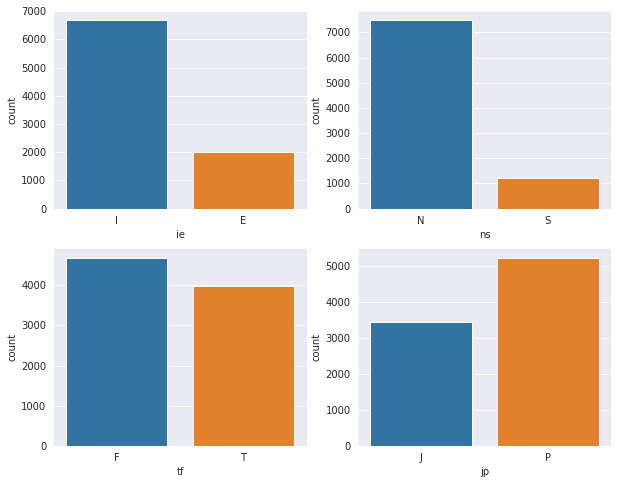

In [8]:
ie_types = df['ie']
ns_types = df['ns']
tf_types = df['tf']
jp_types = df['jp']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8)) 
list_types = [ie_types, ns_types, tf_types, jp_types]
ax = ax.ravel()

for i, item in enumerate(list_types):
    sns.countplot(item, ax=ax[i])

In [9]:
label_ie = ['Introvertion', 'Extrovertion']
label_ns = ['Intuition', 'Sensing']
label_tf = ['Thinking', 'Feeling']
label_jp = ['Judging', 'Perceiving']
lst_axes = ['ie', 'ns', 'tf', 'jp']

In [10]:
df['ie'] = df['ie'].map(lambda x: 0 if x == 'I' else 1)
df['ns'] = df['ns'].map(lambda x: 0 if x == 'N' else 1)
df['tf'] = df['tf'].map(lambda x: 0 if x == 'T' else 1)
df['jp'] = df['jp'].map(lambda x: 0 if x == 'J' else 1)

In [11]:
X = df['cleaned_str']
y_ie = df['ie']
y_ns = df['ns']
y_tf = df['tf']
y_jp = df['jp']

In [12]:
X_train, X_val, y_train_ie, y_val_ie = train_test_split(X, y_ie, random_state=42, stratify=y_ie, test_size=0.33)
X_train, X_val, y_train_ns, y_val_ns = train_test_split(X, y_ns, random_state=42, stratify=y_ns, test_size=0.33)
X_train, X_val, y_train_tf, y_val_tf = train_test_split(X, y_tf, random_state=42, stratify=y_tf, test_size=0.33)
X_train, X_val, y_train_jp, y_val_jp = train_test_split(X, y_jp, random_state=42, stratify=y_jp, test_size=0.33)


In [13]:
nlp = spacy.load('en_core_web_sm')
spacy_stop_words = spacy.lang.en.stop_words.STOP_WORDS
type_stopword = [x.lower() for x in df['type'].unique()]
type_stopwords = type_stopword + [x + 's' for x in type_stopword]

punctuations = string.punctuation

parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if word not in spacy_stop_words and word not in type_stopwords and word not in punctuations ]

    return mytokens

In [14]:
tvec = TfidfVectorizer(tokenizer = spacy_tokenizer, max_features=10000, max_df=0.3)

X_train_tvec = tvec.fit_transform(X_train)
X_val_tvec = tvec.transform(X_val)

In [15]:
def classifiermodel(X_train, y_train, X_test, y_test, model, gs=False, param=False, title=None, label=None):
    
    """"
    Function to fit and display scores of the model, the confusion matrix and AUC ROC
    
    Take in Arguements:
     - X_train, y_train, X_test, y_test - the train test split data
     - model - the type of model to fit data
     - gs - if the model parsed in is a grid search
     - param - If need to print best parameters for pipe steps
     - label - list of labels that model is classifying
     - title - title to print the results
     
     Returns:
     - Predicated Value
     - the predict probabllity 
     - the model (with hyperparams)
     
    """
    model.fit(X_train, y_train)
    trgscore = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    valscore = model.score(X_test, y_test)
    
    
    
    if gs:
        best_model = model.best_estimator_
        best_score = model.best_score_
        best_params =  model.best_params_
    else:
        best_model = model
        best_score = trgscore
        best_params = model.get_params()
        
    proba = model.predict_proba(X_test)
    proba = proba[:, 1]

    print(f'======== {title} =================\n')
    
    if param:
        print('Best parameters  : ', best_params)
        print()
    print('Best CV  score   : ', best_score)
    print('Training score   :', trgscore)
    print('Validation score :', valscore)
    print('Accuracy         :', accuracy_score(y_pred, y_test))
    print('MCC Score        :', matthews_corrcoef(y_pred, y_test))
    print()
    print(classification_report(y_test, y_pred, target_names=label))
        
    return y_pred, proba, best_model

In [16]:
def model_metrics(true, pred, prob, cm=False, show_df=False, title = 'Model_Metrics', labels=['0', '1']):
    """
    Function that calculates and returns a dataframe with classification metrics.
    Input
    true: true values of target variable
    pred: predicted values of target variable
    prob: probability of positive class 
    cm: confusion matrix will be plot if == True
    show_df: dataframe with metrics will be displayed if == True
    title: the column name for the dataframe that is displayed/returned
    labels: the negative and positive class labels 
    
    Output
    df: dataframe with classification metrics
    
    Metric Descriptions
    True Positive: total number of positive class correctly predicted
    True Negative: total number of negative class correctly predicted
    False Positives (Type I Error): total number of negatives class predicted as positive
    False Negative (Type II Error): total number of positives class predicted as negative
    
    Accuracy: Percentage of observations correctly classified.
    Misclassification Rate: Percentage of observations incorrectly classified.
    Sensitivity(Recall): Percentage of observations with positive correctly classified.
    Specificity: Percentage of observations with negative correctly classified.
    Precision: Percentage of positive class prediction vs total positive predictions
    F1 Score: Weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0
    AUC ROC: AUC ROC Score
    """
    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    fpr, tpr, threhold = roc_curve(true, prob)
    
    if cm:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        ax = ax.ravel()
 
        ax[0].set_title('Confusion Matrix')
        sns.heatmap([[tn,fp],[fn,tp]], 
                         annot=True, 
                         cmap="YlGnBu", 
                         cbar_kws={'label': 'Scale'}, 
                         fmt='g', ax=ax[0])
        ax[0].set_xticklabels(labels)
        ax[0].set_yticklabels(labels)
        ax[0].set(ylabel="True Label", xlabel="Predicted Label")
        
        ax[1].set_title('ROC Curve')
        ax[1].plot(fpr, tpr, lw = 2, label='ROC curve (area = %0.2f)' % roc_auc_score(true,prob))
        ax[1].plot([0, 1], [0,1], lw = 2, linestyle = '--')
        ax[1].set(ylabel="True Positive Rate", xlabel="False Positive Rate")
        ax[1].legend(loc='lower right')
        
    df = pd.DataFrame(data = [(tp+tn)/(tp+fp+tn+fn),
                              1- ((tp+tn)/(tp+fp+tn+fn)),
                              tp/(tp+fn),
                              tn/(tn+fp),
                              tp/(tp+fp),
                              tp,
                              fp,
                              fn,
                              tn,
                              f1_score(true, pred),
                              roc_auc_score(true,prob),
                              matthews_corrcoef(true, pred)],
                         index = ['Accuracy',
                                  'Misclassification Rate',
                                  'Sensitivity (Recall)',
                                  'Specificity',
                                  'Precision', 
                                  'True Positive',
                                  'False Positive',
                                  'False Negative',
                                  'True Negative', 
                                  'F1-Score',
                                  'AUC Score',
                                  'Matthews Correlation'],
                        columns = [title])
    if show_df:
        display(df)
    return(df)

In [17]:
def show_most_informative_features(vectorizer, clf, n=20):
    
    """"
    Function to show the positive and neg important features
    Only works for classifiers with Coefficients
    
    Take in Arguements:
     - Vectorizer - the word vectorizer used as features
     - clf - the classifer 
     - n - the top number of features to show
     
     Returns:
     - the dataframe of all the features and the coefficients.
    """
    
    feature_names = vectorizer.get_feature_names()
    
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    
    top_pos = coefs_with_fns[:-(n + 1):-1]
    top_neg = coefs_with_fns[:n]
    
    show_posfeat = pd.DataFrame(top_pos, columns=['positive_coeff', 'pos_feature'])
    show_negfeat = pd.DataFrame(top_neg, columns=['negative_coeff', 'neg_feature'])
    show_feat = show_posfeat.join(show_negfeat)
    display(show_feat)
    
    featimpt = pd.DataFrame(coefs_with_fns, columns=['feature_importance', 'feature']).sort_values(by='feature_importance', ascending=False)
        
    return featimpt
    

In [18]:
def plot_impt_features(features_df, title, top_feat=20, color='b'):
    
    """"
    Function to plot the top features of the positive class 
    
    
    Take in Arguements:
     - features_df - the dataframe of the features and their corresponding score
     - Ttile - title of graph
     - top_feat - the top number of features to show
     - color - the desired color, default to green
     
    """
    
    plt.figure(figsize=(12,6))
    sns.barplot(x = features_df['feature_importance'][:top_feat], y = features_df['feature'][:top_feat], color=color)
    plt.title(title, fontsize=18)
    plt.xlabel('Feature importance', fontsize=14)
    plt.xticks(size=13)
    plt.ylabel(None)
    plt.yticks(size=13);

In [19]:
cv = 5
n_jobs = -1

In [20]:
lr_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('lr', LogisticRegression(random_state = 42, max_iter=1000))])


lr_param_grid = {'lr__solver': ['lbfgs','liblinear'],
                 'lr__C':[1.0, 0.1],
                 'lr__penalty':['l1'],
                 'lr__class_weight':['auto', 'balanced']}

xgb_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('xgb', XGBClassifier(random_state = 42))]) 

xgb_param_grid = {
    'xgb__eval_metric' : ['auc'], 
    'xgb__subsample' : [0.5], 
    'xgb__colsample_bytree' : [0.5], 
    'xgb__learning_rate' : [.01], 
    'xgb__n_estimators' : [100,500], 
    'xgb__reg_alpha' : [0.01], 
    'xgb__scale_pos_weight': [1]
}

In [21]:
%%time

ie_lr_gs = GridSearchCV(lr_pipe, 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

ie_lr_pred, ie_lr_proba, ie_lr_model = classifiermodel(X_train_tvec, y_train_ie, X_val_tvec, y_val_ie,
                                    model=ie_lr_gs, gs=True, param=True,
                                    title='I vs E - LogisticRegression', label=label_ie)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== I vs E - LogisticRegression =================

Best parameters  :  {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.5144831229724767
Training score   : 0.8108863954618091
Validation score : 0.5123186013562773
Accuracy         : 0.6025148445686342
MCC Score        : 0.004377203283764057

              precision    recall  f1-score   support

Introvertion       0.77      0.69      0.73      2203
Extrovertion       0.23      0.32      0.27       660

    accuracy                           0.60      2863
   macro avg       0.50      0.50      0.50      2863
weighted avg       0.65      0.60      0.62      2863

CPU times: user 18.3 s, sys: 1.29 s, total: 19.6 s
Wall time: 6min 32s


,IE LogReg
Accuracy,0.603
Misclassification Rate,0.397
Sensitivity (Recall),0.317
Specificity,0.688
Precision,0.233
True Positive,209.000
False Positive,687.000
False Negative,451.000
True Negative,"1,516.000"
F1-Score,0.269


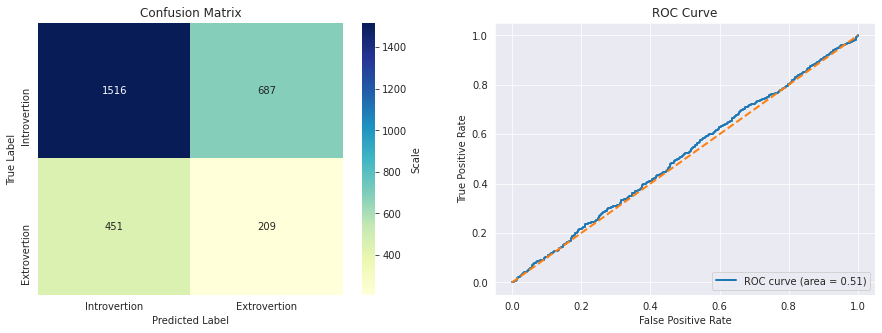

In [22]:
ie_lr_m = model_metrics(y_val_ie, 
                        ie_lr_pred, 
                        ie_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'IE LogReg', labels=label_ie)
ie_lr_m 

In [23]:
ie_lr = ie_lr_model.steps[1][1]
ie_lr_featdf = show_most_informative_features(tvec, ie_lr, n=5)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,8.835,football,-6.702,overwhelmed
1,7.387,literature,-5.742,sums
2,7.095,scored,-5.715,professional
3,6.733,missing,-5.570,including
4,6.351,idiot,-5.111,contrast


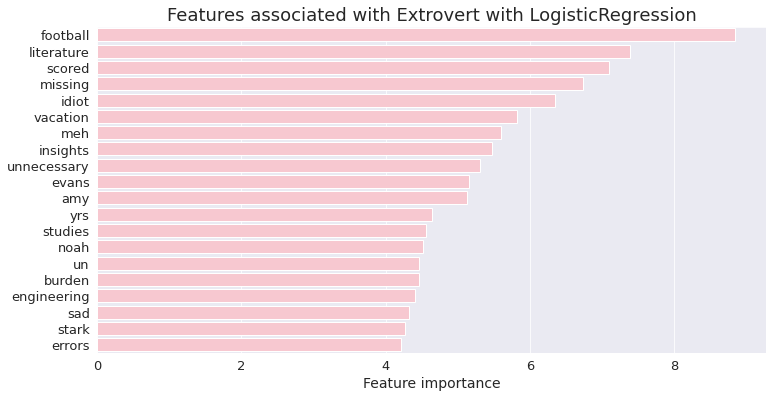

In [24]:
plot_impt_features(ie_lr_featdf, 'Features associated with Extrovert with LogisticRegression', color='pink')

In [25]:
%%time

ie_xgb_gs = GridSearchCV(xgb_pipe, 
                      param_grid=xgb_param_grid, 
                      cv=cv, n_jobs=n_jobs, 
                      scoring='roc_auc', verbose=1)

ie_xgb_pred, ie_xgb_proba, ie_xgb_model = classifiermodel(X_train_tvec, y_train_ie, X_val_tvec, y_val_ie, 
                            model=ie_xgb_gs, gs=True, param=True,
                            title='I vs E - XGBoost', label=label_ie)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== I vs E - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 500, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.5086744012642302
Training score   : 0.6263553439131178
Validation score : 0.4995808057882502
Accuracy         : 0.7453719874257771
MCC Score        : -0.007806455466155424

              precision    recall  f1-score   support

Introvertion       0.77      0.96      0.85      2203
Extrovertion       0.21      0.04      0.07       660

    accuracy                           0.75      2863
   macro avg       0.49      0.50      0.46      2863
weighted avg       0.64      0.75      0.67      2863

CPU times: user 1min 39s, sys: 536 ms, total: 1min 39s
Wall time: 8min 24s


,IE XGBoost
Accuracy,0.745
Misclassification Rate,0.255
Sensitivity (Recall),0.039
Specificity,0.957
Precision,0.215
True Positive,26.000
False Positive,95.000
False Negative,634.000
True Negative,"2,108.000"
F1-Score,0.067


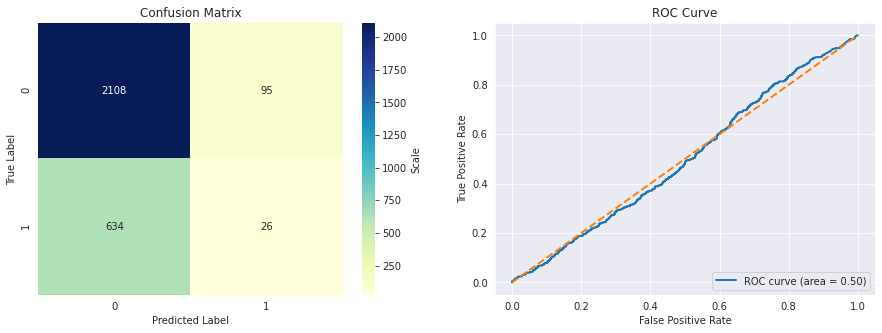

In [26]:
ie_xgb_m = model_metrics(y_val_ie, 
                        ie_xgb_pred, 
                        ie_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'IE XGBoost')
ie_xgb_m

In [27]:
ie_xgb = ie_xgb_model.steps[1][1]
ie_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [28]:
ie_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': ie_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)

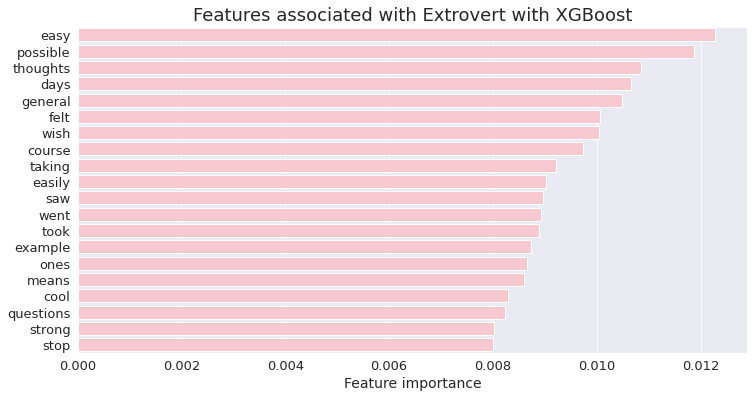

In [29]:
plot_impt_features(ie_xgb_featdf, 'Features associated with Extrovert with XGBoost', color='pink')

In [30]:
%%time
ns_lr_gs = GridSearchCV(lr_pipe, 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

ns_lr_pred, ns_lr_proba, ns_lr_model = classifiermodel(X_train_tvec, y_train_ns, X_val_tvec, y_val_ns,
                                    model=ns_lr_gs, gs=True, param=True,
                                    title='N vs S - LogisticRegression', label=label_ns)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== N vs S - LogisticRegression =================

Best parameters  :  {'lr__C': 0.1, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.48553547795712915
Training score   : 0.4966747303398191
Validation score : 0.5034938350122069
Accuracy         : 0.6999650716032134
MCC Score        : 0.0062862824053281086

              precision    recall  f1-score   support

   Intuition       0.86      0.77      0.82      2468
     Sensing       0.14      0.23      0.18       395

    accuracy                           0.70      2863
   macro avg       0.50      0.50      0.50      2863
weighted avg       0.76      0.70      0.73      2863

CPU times: user 23.2 s, sys: 932 ms, total: 24.2 s
Wall time: 8min 40s


,NS LogReg
Accuracy,0.700
Misclassification Rate,0.300
Sensitivity (Recall),0.233
Specificity,0.775
Precision,0.142
True Positive,92.000
False Positive,556.000
False Negative,303.000
True Negative,"1,912.000"
F1-Score,0.176


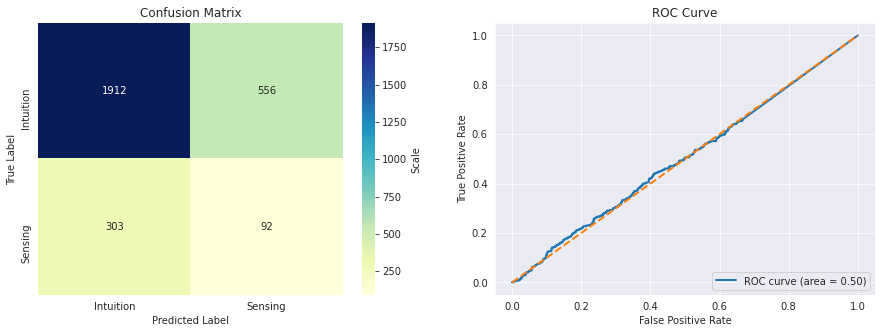

In [31]:
ns_lr_m = model_metrics(y_val_ns, 
                        ns_lr_pred, 
                        ns_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'NS LogReg', labels=label_ns)
ns_lr_m 

In [32]:
ns_lr = ns_lr_model.steps[1][1]
ns_lr_featdf = show_most_informative_features(tvec, ns_lr, n=5)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,2.541,ni,0.000,aaron
1,1.387,w,0.000,aba
2,0.795,si,0.000,aback
3,0.213,haha,0.000,abandon
4,0.165,welcome,0.000,abandoned


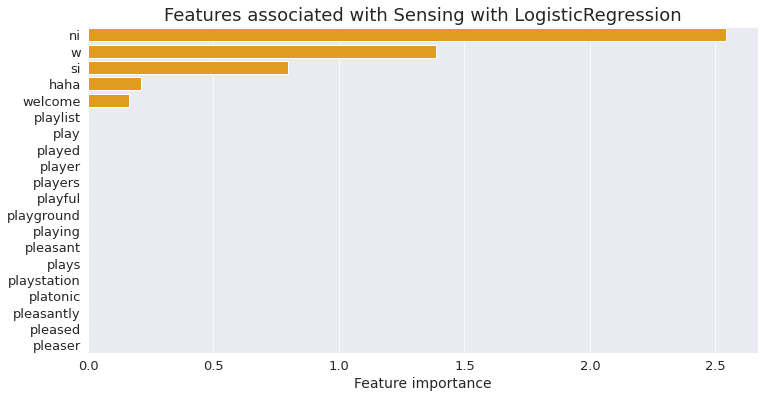

In [33]:
plot_impt_features(ns_lr_featdf, 'Features associated with Sensing with LogisticRegression', color='orange')

In [34]:
%%time

ns_xgb_gs = GridSearchCV(xgb_pipe, 
                     param_grid=xgb_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

ns_xgb_pred, ns_xgb_proba, ns_xgb_model = classifiermodel(X_train_tvec, y_train_ns, X_val_tvec, y_val_ns, 
                            model=ns_xgb_gs, gs=True, param=True,
                            title='N vs S - XGBoost', label=label_ns)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.2min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== N vs S - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.502517806002901
Training score   : 0.5123492416662935
Validation score : 0.5110780009437252
Accuracy         : 0.8333915473279776
MCC Score        : 0.005115260641093045

              precision    recall  f1-score   support

   Intuition       0.86      0.96      0.91      2468
     Sensing       0.15      0.04      0.07       395

    accuracy                           0.83      2863
   macro avg       0.50      0.50      0.49      2863
weighted avg       0.76      0.83      0.79      2863

CPU times: user 44.3 s, sys: 808 ms, total: 45.1 s
Wall time: 8min 55s


,NS XGBoost
Accuracy,0.833
Misclassification Rate,0.167
Sensitivity (Recall),0.043
Specificity,0.960
Precision,0.147
True Positive,17.000
False Positive,99.000
False Negative,378.000
True Negative,"2,369.000"
F1-Score,0.067


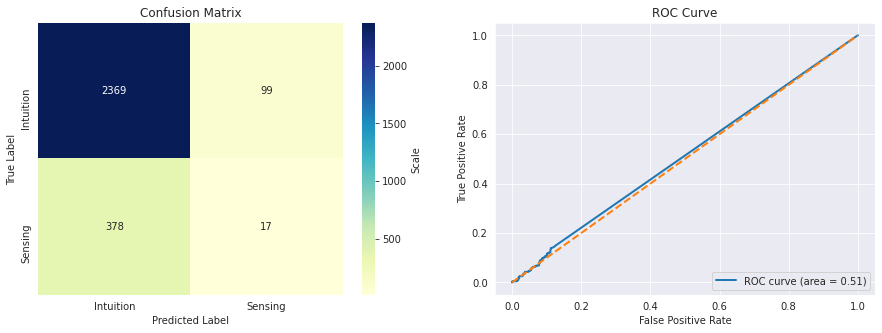

In [35]:
ns_xgb_m = model_metrics(y_val_ns, 
                        ns_xgb_pred, 
                        ns_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'NS XGBoost', labels=label_ns)
ns_xgb_m

In [36]:
ns_xgb = ns_xgb_model.steps[1][1]
ns_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [37]:
ns_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': ns_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)


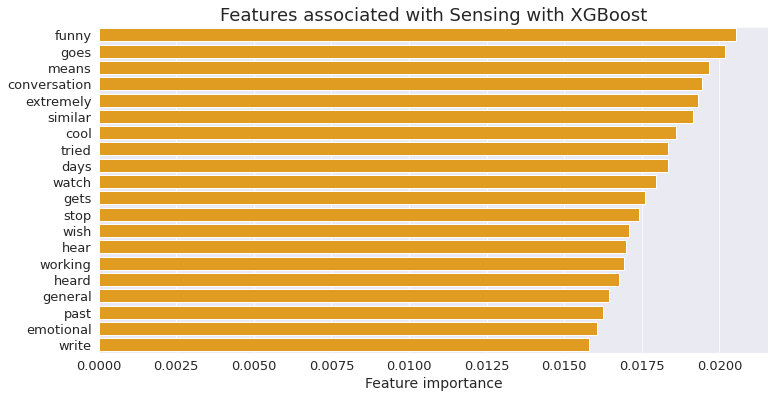

In [38]:
plot_impt_features(ns_xgb_featdf, 'Features associated with Sensing with XGBoost', color='orange')

In [39]:
%%time

tf_lr_gs = GridSearchCV(lr_pipe , 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

tf_lr_pred, tf_lr_proba, tf_lr_model = classifiermodel(X_train_tvec, y_train_tf, X_val_tvec, y_val_tf,
                                    model=tf_lr_gs, gs=True, param=True,
                                    title='T vs F - LogisticRegression', label=label_tf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== T vs F - LogisticRegression =================

Best parameters  :  {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.5117973489598271
Training score   : 0.6773038902728574
Validation score : 0.5009958798969827
Accuracy         : 0.4970310862731401
MCC Score        : -0.009042307859230343

              precision    recall  f1-score   support

    Thinking       0.45      0.48      0.47      1314
     Feeling       0.54      0.51      0.53      1549

    accuracy                           0.50      2863
   macro avg       0.50      0.50      0.50      2863
weighted avg       0.50      0.50      0.50      2863

CPU times: user 7.26 s, sys: 142 ms, total: 7.4 s
Wall time: 2min 24s


,TF LogReg
Accuracy,0.497
Misclassification Rate,0.503
Sensitivity (Recall),0.515
Specificity,0.476
Precision,0.537
True Positive,797.000
False Positive,688.000
False Negative,752.000
True Negative,626.000
F1-Score,0.525


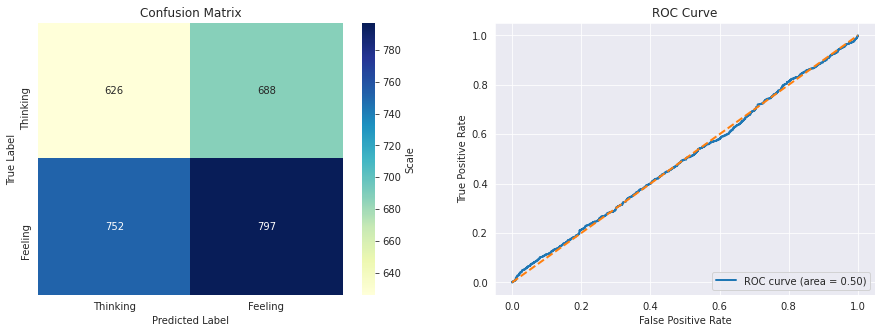

In [40]:
tf_lr_m = model_metrics(y_val_tf, 
                        tf_lr_pred, 
                        tf_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'TF LogReg', labels=label_tf)
tf_lr_m 

In [41]:
tf_lr = tf_lr_model.steps[1][1]
tf_lr_featdf = show_most_informative_features(tvec, tf_lr, n=30)


,positive_coeff,pos_feature,negative_coeff,neg_feature
0,3.026,age,-3.014,answers
1,2.623,actions,-2.946,beings
2,2.454,invite,-2.861,cautious
3,2.332,likes,-2.444,congratulations
4,2.273,lazy,-2.434,straight
5,2.148,listen,-2.355,cute
6,1.897,cognitive,-2.266,non
7,1.867,congrats,-2.144,stories
8,1.769,generally,-1.971,weakness
9,1.697,order,-1.959,fear


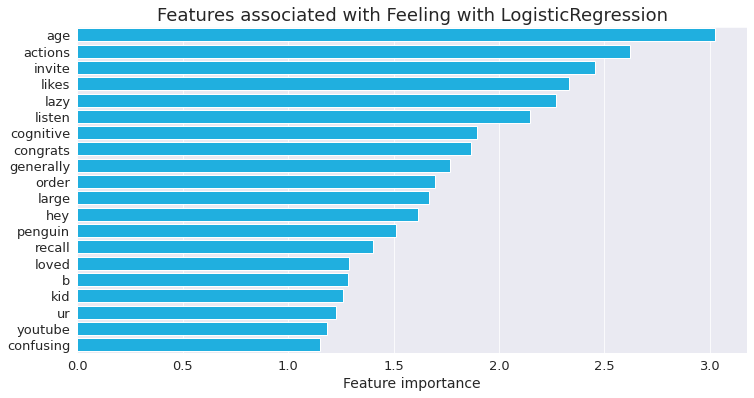

In [42]:
plot_impt_features(tf_lr_featdf, 'Features associated with Feeling with LogisticRegression', color='deepskyblue')

In [43]:
%%time
tf_xgb_gs = GridSearchCV(xgb_pipe, 
                     param_grid=xgb_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

tf_xgb_pred, tf_xgb_proba, tf_xgb_model = classifiermodel(X_train_tvec, y_train_tf, X_val_tvec, y_val_tf, 
                            model=tf_xgb_gs, gs=True, param=True,
                            title='T vs F - XGBoost', label=label_tf)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== T vs F - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.4950346226086557
Training score   : 0.5773021615541301
Validation score : 0.5047094261235953
Accuracy         : 0.5340551868669228
MCC Score        : -0.004434945352559194

              precision    recall  f1-score   support

    Thinking       0.45      0.07      0.12      1314
     Feeling       0.54      0.93      0.68      1549

    accuracy                           0.53      2863
   macro avg       0.50      0.50      0.40      2863
weighted avg       0.50      0.53      0.43      2863

CPU times: user 18.6 s, sys: 269 ms, total: 18.8 s
Wall time: 4min 3s


,TF XGBoost
Accuracy,0.534
Misclassification Rate,0.466
Sensitivity (Recall),0.928
Specificity,0.070
Precision,0.540
True Positive,"1,437.000"
False Positive,"1,222.000"
False Negative,112.000
True Negative,92.000
F1-Score,0.683


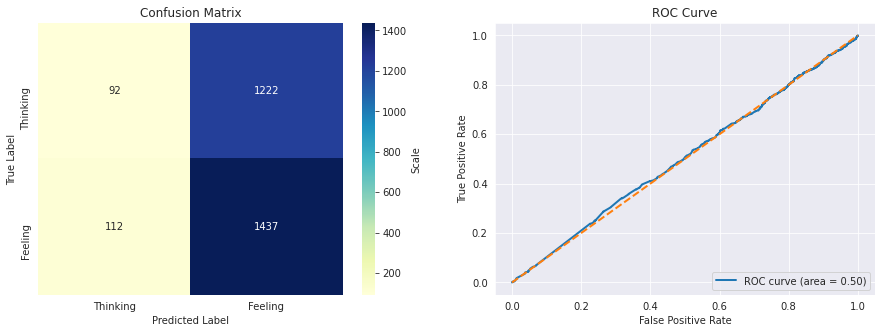

In [44]:
tf_xgb_m = model_metrics(y_val_tf, 
                        tf_xgb_pred, 
                        tf_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'TF XGBoost', labels=label_tf)
tf_xgb_m

In [45]:
tf_xgb = tf_xgb_model.steps[1][1]

tf_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': tf_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)


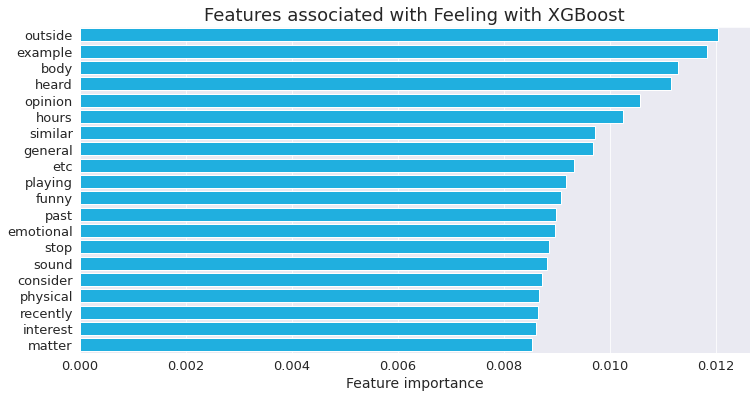

In [46]:
plot_impt_features(tf_xgb_featdf, 'Features associated with Feeling with XGBoost', color='deepskyblue')

In [47]:
%%time

jp_lr_gs = GridSearchCV(lr_pipe, 
                     param_grid=lr_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)


jp_lr_pred, jp_lr_proba, jp_lr_model = classifiermodel(X_train_tvec, y_train_jp, X_val_tvec, y_val_jp,
                                    model=jp_lr_gs, gs=True, param=True,
                                    title='J vs P - LogisticRegression', label=label_jp)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== J vs P - LogisticRegression =================

Best parameters  :  {'lr__C': 1.0, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.6985861853685881
Training score   : 0.8110500418935411
Validation score : 0.6975470514109047
Accuracy         : 0.6528117359413202
MCC Score        : 0.27561712727913495

              precision    recall  f1-score   support

     Judging       0.56      0.57      0.56      1133
  Perceiving       0.71      0.71      0.71      1730

    accuracy                           0.65      2863
   macro avg       0.64      0.64      0.64      2863
weighted avg       0.65      0.65      0.65      2863

CPU times: user 9.82 s, sys: 217 ms, total: 10 s
Wall time: 3min 25s


,JP LogReg
Accuracy,0.653
Misclassification Rate,0.347
Sensitivity (Recall),0.709
Specificity,0.568
Precision,0.714
True Positive,"1,226.000"
False Positive,490.000
False Negative,504.000
True Negative,643.000
F1-Score,0.712


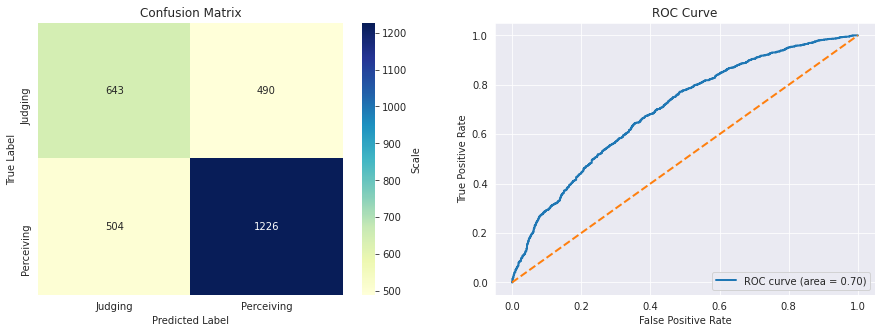

In [48]:
jp_lr_m = model_metrics(y_val_jp, 
                        jp_lr_pred, 
                        jp_lr_proba, 
                        cm=True, show_df=False, 
                        title = 'JP LogReg', labels=label_jp)
jp_lr_m 

In [49]:
jp_lr = jp_lr_model.steps[1][1]
jp_lr_featdf = show_most_informative_features(tvec, jp_lr, n=5)


,positive_coeff,pos_feature,negative_coeff,neg_feature
0,11.737,ne,-16.376,ni
1,7.000,lazy,-7.873,newton
2,6.120,theories,-5.764,intuition
3,4.580,distracted,-5.070,plan
4,4.530,fi,-5.036,hsp


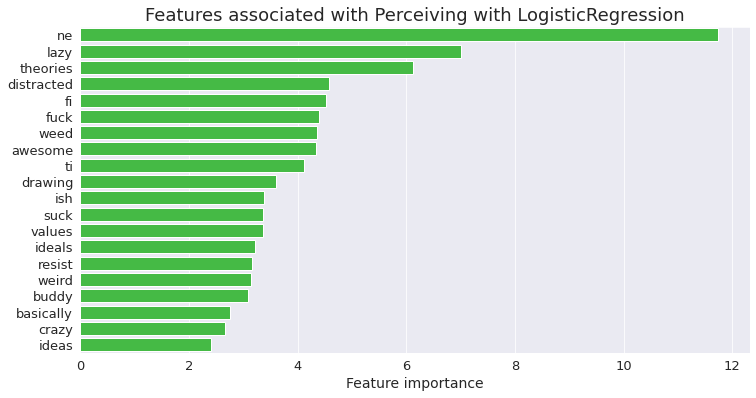

In [50]:
plot_impt_features(jp_lr_featdf, 'Features associated with Perceiving with LogisticRegression', color='limegreen')


In [51]:
%%time
jp_xgb_gs = GridSearchCV(xgb_pipe, 
                     param_grid=xgb_param_grid, 
                     cv=cv, n_jobs=n_jobs, 
                     scoring='roc_auc', verbose=1)

jp_xgb_pred, jp_xgb_proba, jp_xgb_model = classifiermodel(X_train_tvec, y_train_jp, X_val_tvec, y_val_jp, 
                            model=jp_xgb_gs, gs=True, param=True,
                            title='J vs P - XGBoost', label=label_jp)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== J vs P - XGBoost =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'auc', 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 500, 'xgb__reg_alpha': 0.01, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5}

Best CV  score   :  0.6350564732443743
Training score   : 0.7524768186803726
Validation score : 0.6508571035003494
Accuracy         : 0.6318546978693678
MCC Score        : 0.1708216716297142

              precision    recall  f1-score   support

     Judging       0.58      0.24      0.34      1133
  Perceiving       0.64      0.89      0.74      1730

    accuracy                           0.63      2863
   macro avg       0.61      0.56      0.54      2863
weighted avg       0.62      0.63      0.59      2863

CPU times: user 1min 8s, sys: 369 ms, total: 1min 8s
Wall time: 5min 43s


,JP XGBoost
Accuracy,0.632
Misclassification Rate,0.368
Sensitivity (Recall),0.886
Specificity,0.244
Precision,0.641
True Positive,"1,533.000"
False Positive,857.000
False Negative,197.000
True Negative,276.000
F1-Score,0.744


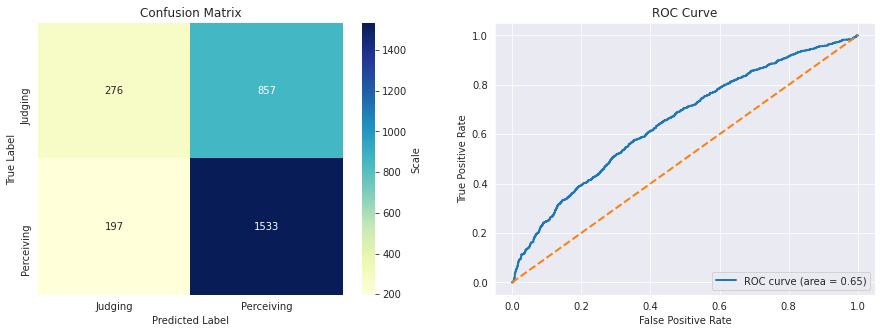

In [52]:
jp_xgb_m = model_metrics(y_val_jp, 
                        jp_xgb_pred, 
                        jp_xgb_proba, 
                        cm=True, show_df=False, 
                        title = 'JP XGBoost', labels=label_jp)
jp_xgb_m

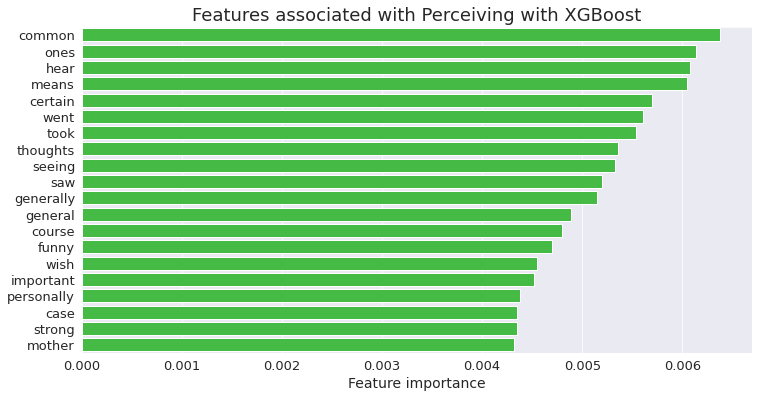

In [53]:
jp_xgb = jp_xgb_model.steps[1][1]

jp_xgb_featdf = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': jp_xgb.feature_importances_}).sort_values('feature_importance', ascending=False)

plot_impt_features(jp_xgb_featdf, 'Features associated with Perceiving with XGBoost', color='limegreen')

In [54]:
lst_metrics = [ie_lr_m, ie_xgb_m, ns_lr_m, ns_xgb_m, tf_lr_m, tf_xgb_m, jp_lr_m, jp_xgb_m]
combine_metrics = pd.concat((items for items in lst_metrics), axis=1, join='inner')
combine_metrics.reset_index().rename(columns={combine_metrics.index.name:'metrics'})  

combine_metrics

,IE LogReg,IE XGBoost,NS LogReg,NS XGBoost,TF LogReg,TF XGBoost,JP LogReg,JP XGBoost
Accuracy,0.603,0.745,0.700,0.833,0.497,0.534,0.653,0.632
Misclassification Rate,0.397,0.255,0.300,0.167,0.503,0.466,0.347,0.368
Sensitivity (Recall),0.317,0.039,0.233,0.043,0.515,0.928,0.709,0.886
Specificity,0.688,0.957,0.775,0.960,0.476,0.070,0.568,0.244
Precision,0.233,0.215,0.142,0.147,0.537,0.540,0.714,0.641
True Positive,209.000,26.000,92.000,17.000,797.000,"1,437.000","1,226.000","1,533.000"
False Positive,687.000,95.000,556.000,99.000,688.000,"1,222.000",490.000,857.000
False Negative,451.000,634.000,303.000,378.000,752.000,112.000,504.000,197.000
True Negative,"1,516.000","2,108.000","1,912.000","2,369.000",626.000,92.000,643.000,276.000
F1-Score,0.269,0.067,0.176,0.067,0.525,0.683,0.712,0.744


In [55]:
ie_selected = ie_lr
ns_selected = ns_lr
tf_selected = tf_lr
jp_selected = jp_lr

In [56]:
def clean_text(data, add_stopwords=None, lem_stem=None):
    
    """
    Function to convert raw text to words for processing.
    Function will remove all irrevant characters(or digits), HTML tags, stopwords), 

    
    Takes in arguement:
    text- str the raw text to be converted
    add_stopwords - list of additional stopwords that needs to be added
    lem_stem - type of Lemmatization or stemming to be done
    
    return the processed text in string 
    """   
    
    URL_RE = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))')

    SYMBOLS_RE = re.compile('[^a-zA-Z]')
    
    STOPWORDS = set(stopwords.words('english'))
    
    if add_stopwords is not None:
        STOPWORDS.update(add_stopwords)
    
    text = data.lower() 
    
    text = URL_RE.sub('urlstr', text) 
    
    text = SYMBOLS_RE.sub(' ', text) 
    
    text_list = [word for word in text.split() if word not in STOPWORDS] 
    
    if lem_stem == 'lem':
        lemmatizer = WordNetLemmatizer()
        text_processed = [lemmatizer.lemmatize(w) for w in text_list]
    elif lem_stem == 'stemp':
        
        stemmer = PorterStemmer()
        text_processed = [stemmer.stem(w) for w in text_list]
    elif lem_stem == 'stems':
        stemmer = SnowballStemmer("english")
        text_processed = [stemmer.stem(w) for w in text_list]
    else:
        text_processed = text_list
    
    
    return text_processed
    

In [57]:
def mapkey(prediction, trait):
    if (trait == 'IE'):
        return 'I' if prediction == 0 else 'E'
    elif(trait == 'NS'):
        return 'N' if prediction == 0 else 'S'
    elif(trait == 'TF'):
        return 'T' if prediction == 0 else 'F'
    else:
        return 'J' if prediction == 0 else 'P'

In [58]:
def predictMBTI(test):
    results = ""
    
    print("====== Introversion vs Extroversion ======")
    ie_predictions = ie_selected.predict(test)
    print(ie_selected.predict_proba(test))
    results += mapkey(ie_predictions, 'IE')
    print()

    print("====== INtuition vs Sensing ======")
    ns_predictions = ns_selected.predict(test)
    print(ns_selected.predict_proba(test))
    results += mapkey(ns_predictions, 'NS')
    print()

    print("====== Thinking vs Feeling ======")
    tf_predictions = tf_selected.predict(test)
    print(tf_selected.predict_proba(test))
    results += mapkey(tf_predictions, 'TF')
    print()


    print("====== Judging vs Perceiving ======")
    jp_predictions = jp_selected.predict(test)
    print(jp_selected.predict_proba(test))
    results += mapkey(jp_predictions, 'JP')
    print()


    print("Results: ", results)
    
    return results

In [59]:
predict1 = "We have a 5 billion dollar website. I have so many websites. I have them all over the place... I hire people... it costs me three dollars. I will build a great wall--and nobody builds walls better than me, believe me--and I'll build them very inexpensively. I will build a great, great wall on our southern border, and I will make Mexico pay for that wall. Mark my words. This is the most reasonably path I can take, with domination! The line of 'Make America great again,' the phrase, that was mine, I came up with it about a year ago, and I kept using it, and everybody's using it, they are all loving it. I don't know, I guess I should copyright it, maybe I have copyrighted it. "

In [60]:
import nltk
nltk.download('stopwords')
list_cleaned = clean_text(predict1, add_stopwords=None, lem_stem=None)
predict1_cleaned = " ".join(r for r in list_cleaned) 
predict1_cleaned

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'billion dollar website many websites place hire people costs three dollars build great wall nobody builds walls better believe build inexpensively build great great wall southern border make mexico pay wall mark words reasonably path take domination line make america great phrase mine came year ago kept using everybody using loving know guess copyright maybe copyrighted'

In [61]:
X_test = tvec.transform([predict1_cleaned])
X_test.shape

(1, 10000)

In [62]:
predictMBTI(X_test)

====== Introversion vs Extroversion ======
[[0.35163121 0.64836879]]

====== INtuition vs Sensing ======
[[0.52605503 0.47394497]]

====== Thinking vs Feeling ======
[[0.48255306 0.51744694]]

====== Judging vs Perceiving ======
[[0.39881225 0.60118775]]

Results:  ENFP


'ENFP'

In [63]:
predict2 = 'Justice and I became friends, though we were opposites in many ways – he was extroverted, I was introverted; he was lighthearted, I was serious. I enjoyed the discipline and solitariness of long-distance running, which allowed me to escape from the hurly-burly of school life.I went as an observer, not a participant, for I do not think that I ever spoke. I wanted to understand the issues under discussion, evaluate the arguments, see the calibre of the men involved. I learned that courage was not the absence of fear, but the triumph over it. The brave man is not he who does not feel afraid, but he who conquers that fear No one is born hating another person because of the color of his skin, or his background, or his religion. People must learn to hate, and if they can learn to hate, they can be taught to love, for love comes more naturally to the human heart than its opposite. Everyone can rise above their circumstances and achieve success if they are dedicated to and passionate about what they do.Do not judge me by my successes, judge me by how many times I fell down and got back up again'

In [64]:
list_cleaned = clean_text(predict2, add_stopwords=None, lem_stem=None)
predict2_cleaned = " ".join(r for r in list_cleaned) 
predict2_cleaned

'justice became friends though opposites many ways extroverted introverted lighthearted serious enjoyed discipline solitariness long distance running allowed escape hurly burly school life went observer participant think ever spoke wanted understand issues discussion evaluate arguments see calibre men involved learned courage absence fear triumph brave man feel afraid conquers fear one born hating another person color skin background religion people must learn hate learn hate taught love love comes naturally human heart opposite everyone rise circumstances achieve success dedicated passionate judge successes judge many times fell got back'

In [65]:
X_test2 = tvec.transform([predict2_cleaned])
X_test2.shape

(1, 10000)

In [66]:
predictMBTI(X_test2)

====== Introversion vs Extroversion ======
[[0.80198519 0.19801481]]

====== INtuition vs Sensing ======
[[0.52605503 0.47394497]]

====== Thinking vs Feeling ======
[[0.57414211 0.42585789]]

====== Judging vs Perceiving ======
[[0.5045696 0.4954304]]

Results:  INTJ


'INTJ'